Annotation Padding 0.0: Attention Induction vs Rank Induction: p = 0.032 
Annotation Padding 448.0: Attention Induction vs Rank Induction: p = 0.061 
Annotation Padding 896.0: Attention Induction vs Rank Induction: p = 0.070 
Annotation Padding 1344.0: Attention Induction vs Rank Induction: p = 0.163 
Annotation Padding 1792.0: Attention Induction vs Rank Induction: p = 0.285 
Annotation Padding 2240.0: Attention Induction vs Rank Induction: p = 0.061 


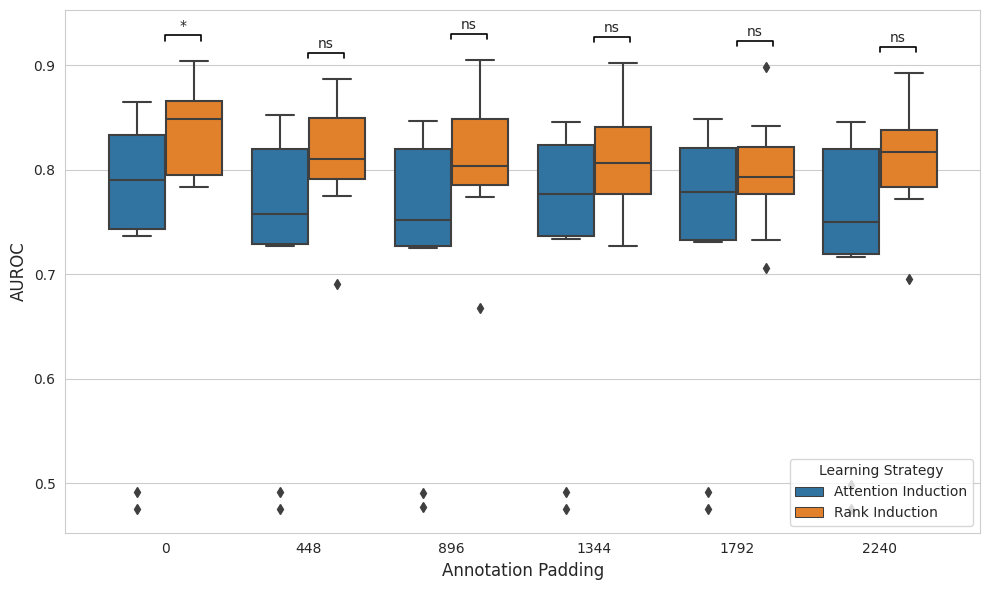

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250519_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['sampling_ratio'] == 1) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['abmil', 'att', 'rank'])) &
    (df['random_state'].between(2018, 2027))
]

model_map = {
    'att': 'Attention Induction',
    'rank': 'Rank Induction'
}
df['Model'] = df['model'].map(model_map)
df['Annotation Padding'] = df['morphology_value']

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.boxplot(
    x='Annotation Padding',
    y='auroc',
    hue='Model',
    data=df,
    showfliers=True
)

def sig_label(p):
    if p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return 'ns'

offsets = {
    'Attention Induction':  0.00,
    'Rank Induction':       +0.25
}

for i, sr in enumerate(sorted(df['Annotation Padding'].unique())):
    sub = df[df['Annotation Padding'] == sr]
    att  = sub[sub['Model']=='Attention Induction']['auroc']
    rank = sub[sub['Model']=='Rank Induction']['auroc']
    
    _, p_at = mannwhitneyu(att, rank, alternative='less')

    print(f"Annotation Padding {sr:.1f}: Attention Induction vs Rank Induction: p = {p_at:.3f} ")
    
    y0 = sub['auroc'].max() + 0.02
    
    y, h = y0, 0.005
    
    x1, x2 = i + offsets['Attention Induction'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y0, y0+h, y0+h, y0], lw=1.2, c='k')
    ax.text((x1+x2)/2, y0+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Annotation Padding', fontsize=12)
ax.set_ylabel('AUROC', fontsize=12)
ax.legend(title='Learning Strategy', loc='lower right')
plt.tight_layout()
plt.show()


Annotation Padding 0.0: Attention Induction vs Rank Induction: p = 0.026 
Annotation Padding 448.0: Attention Induction vs Rank Induction: p = 0.089 
Annotation Padding 896.0: Attention Induction vs Rank Induction: p = 0.076 
Annotation Padding 1344.0: Attention Induction vs Rank Induction: p = 0.212 
Annotation Padding 1792.0: Attention Induction vs Rank Induction: p = 0.571 
Annotation Padding 2240.0: Attention Induction vs Rank Induction: p = 0.104 


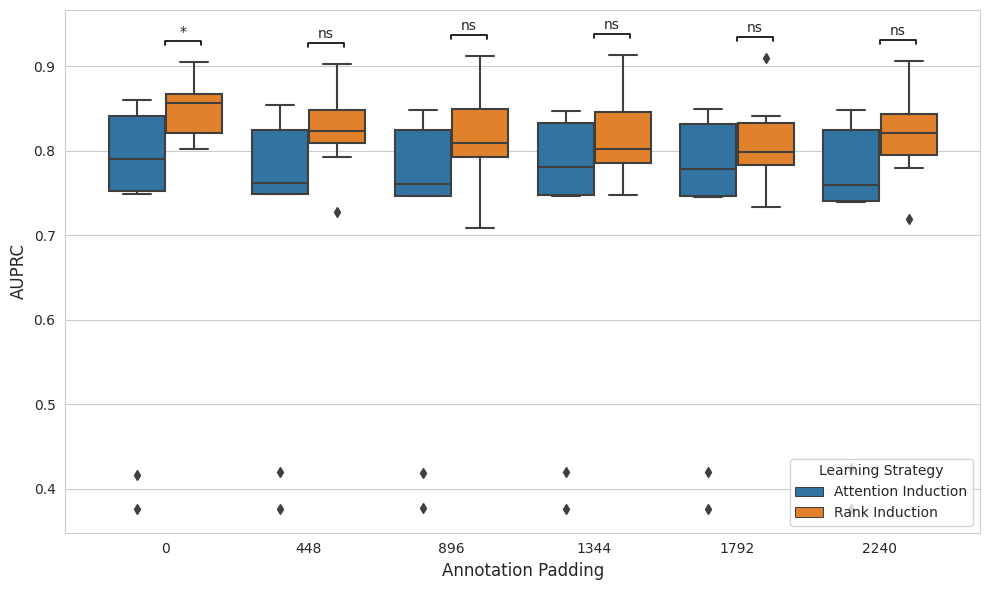

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250519_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['sampling_ratio'] == 1) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['abmil', 'att', 'rank'])) &
    (df['random_state'].between(2018, 2027))
]

model_map = {
    'att': 'Attention Induction',
    'rank': 'Rank Induction'
}
df['Model'] = df['model'].map(model_map)
df['Annotation Padding'] = df['morphology_value']

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.boxplot(
    x='Annotation Padding',
    y='auprc',
    hue='Model',
    data=df,
    showfliers=True
)

def sig_label(p):
    if p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return 'ns'

offsets = {
    'Attention Induction':  0.00,
    'Rank Induction':       +0.25
}

for i, sr in enumerate(sorted(df['Annotation Padding'].unique())):
    sub = df[df['Annotation Padding'] == sr]

    att  = sub[sub['Model']=='Attention Induction']['auprc']
    rank = sub[sub['Model']=='Rank Induction']['auprc']
    
    _, p_at = mannwhitneyu(att, rank, alternative='less')

    print(f"Annotation Padding {sr:.1f}: Attention Induction vs Rank Induction: p = {p_at:.3f} ")
    
    y0 = sub['auprc'].max() + 0.02
    
    y, h = y0, 0.005
    
    x1, x2 = i + offsets['Attention Induction'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y0, y0+h, y0+h, y0], lw=1.2, c='k')
    ax.text((x1+x2)/2, y0+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Annotation Padding', fontsize=12)
ax.set_ylabel('AUPRC', fontsize=12)
ax.legend(title='Learning Strategy', loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250519_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['sampling_ratio'] == 1) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['att', 'rank'])) &
    (df['random_state'].between(2018, 2027))
]

name_map = {
    'att':  'Attention Induction',
    'rank': 'Rank Induction'
}
df['Model'] = df['model'].map(name_map)

metrics = ['auroc','auprc','accuracy']

summary = (
    df
    .groupby(['morphology_value','Model'])[metrics]
    .agg(['mean','std'])
    .round(3)
)

formatted = pd.DataFrame(index=summary.index)

for m in metrics:
    means = summary[(m, 'mean')].map('{:.3f}'.format)
    stds  = summary[(m, 'std')].map('{:.3f}'.format)
    formatted[m] = means + ' ± ' + stds

formatted.index.names = ['morphology_value','Model']

print(formatted)


                                              auroc          auprc  \
morphology_value Model                                               
0                Attention Induction  0.743 ± 0.143  0.728 ± 0.179   
                 Rank Induction       0.840 ± 0.044  0.851 ± 0.037   
448              Attention Induction  0.727 ± 0.135  0.714 ± 0.171   
                 Rank Induction       0.811 ± 0.055  0.825 ± 0.047   
896              Attention Induction  0.725 ± 0.135  0.713 ± 0.171   
                 Rank Induction       0.808 ± 0.064  0.818 ± 0.055   
1344             Attention Induction  0.734 ± 0.138  0.721 ± 0.175   
                 Rank Induction       0.806 ± 0.054  0.814 ± 0.051   
1792             Attention Induction  0.733 ± 0.137  0.720 ± 0.174   
                 Rank Induction       0.796 ± 0.054  0.805 ± 0.051   
2240             Attention Induction  0.723 ± 0.133  0.712 ± 0.170   
                 Rank Induction       0.810 ± 0.054  0.818 ± 0.049   

                   

In [6]:
df

,Name,model,dataset,morphology_value,random_state,sampling_ratio,anno_ratio,accuracy,auroc,test_loss,...,train_prauc,train_sensitivity,train_specificity,val_accuracy,val_auroc,val_loss,val_prauc,val_sensitivity,val_specificity,Model
70,resnet50_20x_attention_induction_2018_1344,att,camelyon,1344,2018,1.0,1.0,0.620155,0.492092,0.685666,...,0.702360,1.000000,0.104167,0.407407,0.515625,0.717815,0.450026,0.818182,0.12500,Attention Induction
71,resnet50_20x_attention_induction_2018_1792,att,camelyon,1792,2018,1.0,1.0,0.620155,0.492092,0.685651,...,0.703606,1.000000,0.104167,0.407407,0.515625,0.717383,0.450026,0.818182,0.12500,Attention Induction
72,resnet50_20x_attention_induction_2018_2240,att,camelyon,2240,2018,1.0,1.0,0.620155,0.498214,0.685603,...,0.702480,1.000000,0.104167,0.407407,0.517045,0.716555,0.449716,0.818182,0.12500,Attention Induction
73,resnet50_20x_attention_induction_2018_448,att,camelyon,448,2018,1.0,1.0,0.620155,0.492092,0.685719,...,0.703556,1.000000,0.104167,0.407407,0.518466,0.719333,0.457314,0.818182,0.12500,Attention Induction
74,resnet50_20x_attention_induction_2018_896,att,camelyon,896,2018,1.0,1.0,0.620155,0.490816,0.686130,...,0.703646,1.000000,0.104167,0.407407,0.515625,0.718156,0.450026,0.818182,0.12500,Attention Induction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,resnet50x_3rd_base_2023,abmil,camelyon,0,2023,1.0,1.0,0.844961,0.844388,0.429192,...,0.992460,0.934783,0.967742,0.888889,0.947443,0.291574,0.953617,0.772727,0.96875,NaN
316,resnet50x_3rd_base_2024,abmil,camelyon,0,2024,1.0,1.0,0.813953,0.739541,0.514189,...,0.928256,0.752137,0.858586,0.759259,0.896307,0.466530,0.871137,0.909091,0.65625,NaN
317,resnet50x_3rd_base_2025,abmil,camelyon,0,2025,1.0,1.0,0.604651,0.477041,0.683175,...,0.611033,0.784483,0.300000,0.425926,0.517045,0.715911,0.406491,0.727273,0.21875,NaN
318,resnet50x_3rd_base_2026,abmil,camelyon,0,2026,1.0,1.0,0.806202,0.724235,0.578620,...,0.949982,0.870000,0.905172,0.870370,0.967330,0.361347,0.958700,0.954545,0.81250,NaN


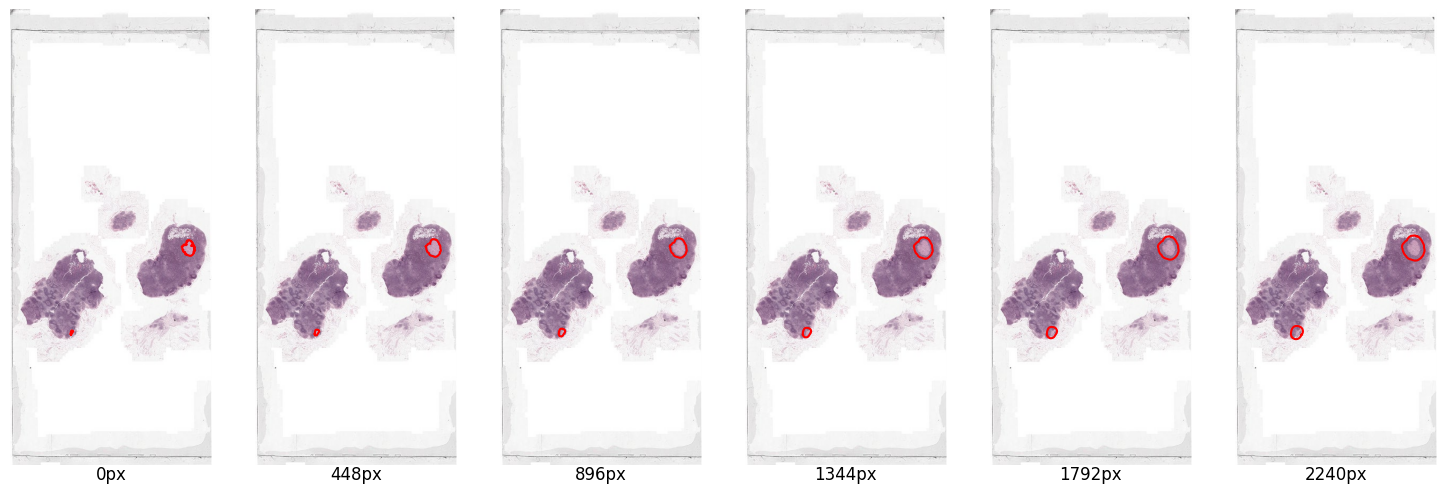

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from openslide import OpenSlide
from camelyon.data_models import Polygons


file_path       = "/vast/AI_team/dataset/CAMELYON16/images/tumor_062.tif"
DOWNSAMPLE_RATE = 256
pad_values      = [0, 448, 896, 1344, 1792, 2240]

osr      = OpenSlide(file_path)
w, h     = osr.dimensions
polygons = Polygons.from_xml(
    file_path.replace("images", "annotations").replace(".tif", ".xml")
)

n = len(pad_values)
fig, axes = plt.subplots(
    1, n,
    figsize=(n * 2.5, 5),               
    sharex=True, sharey=True,
    gridspec_kw={'wspace': 0.0}      
)

for ax, pad in zip(axes, pad_values):
    thumb = osr.get_thumbnail((w // DOWNSAMPLE_RATE, h // DOWNSAMPLE_RATE))
    img   = np.array(thumb)

    for poly in polygons.data:
        poly_buf = poly.buffer(pad, resolution=64) if pad > 0 else poly
        xs, ys   = poly_buf.exterior.xy
        xs_ds = np.array(xs) / DOWNSAMPLE_RATE
        ys_ds = np.array(ys) / DOWNSAMPLE_RATE
        ax.plot(xs_ds, ys_ds, color="red", linewidth=1.5)

    ax.imshow(img)
    ax.set_axis_off()

    ax.set_title(f"{pad}px", y=-0.05, fontsize=12)

plt.tight_layout()
plt.show()

